In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv


## Logistic Regression - Statistical and Machine Learning Model.

Objective of buidling the model is to estimate the prediction of affected by the CHD- Heart Disease.

## Steps of this notebook

This notebook has the following useful features

* Checking outliers,distributions
* Data Cleaning
* Feature Selection- Backward Elimination
* Statistical Model with classification report,ROC analysis
* Machine Learning LogisticRegression


In [2]:
# Importing the neccasry Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Data Loading
df=pd.read_csv("/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Analysis of the target Varaible

In [4]:
df.TenYearCHD.value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

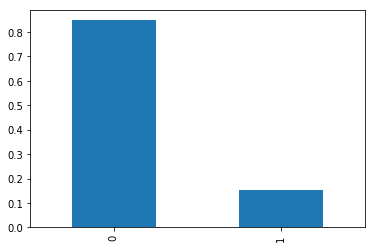

In [5]:
df.TenYearCHD.value_counts(normalize=True).plot(kind='bar')
plt.show()

In [6]:
## Checking for Null Values and imputing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
male               4238 non-null int64
age                4238 non-null int64
education          4133 non-null float64
currentSmoker      4238 non-null int64
cigsPerDay         4209 non-null float64
BPMeds             4185 non-null float64
prevalentStroke    4238 non-null int64
prevalentHyp       4238 non-null int64
diabetes           4238 non-null int64
totChol            4188 non-null float64
sysBP              4238 non-null float64
diaBP              4238 non-null float64
BMI                4219 non-null float64
heartRate          4237 non-null float64
glucose            3850 non-null float64
TenYearCHD         4238 non-null int64
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [8]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [9]:
# Forward and Backward fill is used to fill the null values so the distribution is not affected
df.fillna(method='ffill',inplace=True)
df.fillna(method='bfill',inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
male               4238 non-null int64
age                4238 non-null int64
education          4238 non-null float64
currentSmoker      4238 non-null int64
cigsPerDay         4238 non-null float64
BPMeds             4238 non-null float64
prevalentStroke    4238 non-null int64
prevalentHyp       4238 non-null int64
diabetes           4238 non-null int64
totChol            4238 non-null float64
sysBP              4238 non-null float64
diaBP              4238 non-null float64
BMI                4238 non-null float64
heartRate          4238 non-null float64
glucose            4238 non-null float64
TenYearCHD         4238 non-null int64
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


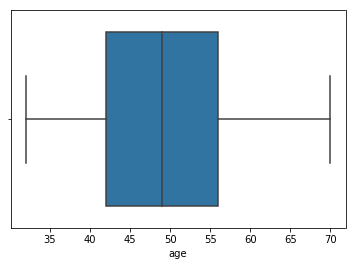

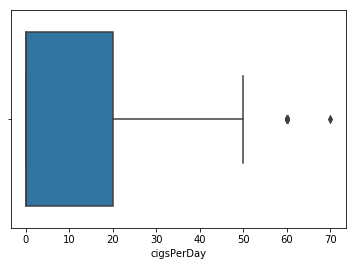

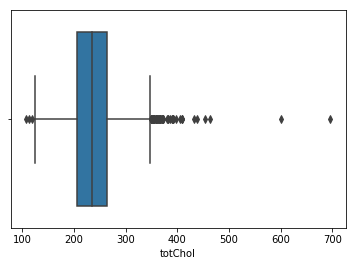

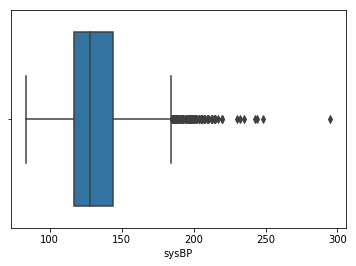

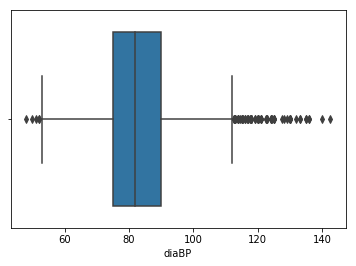

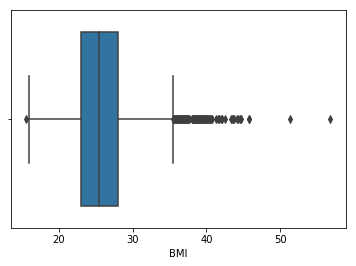

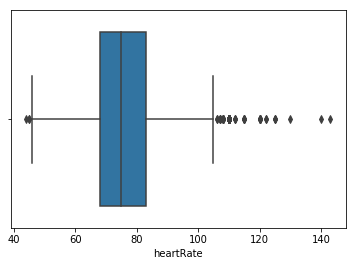

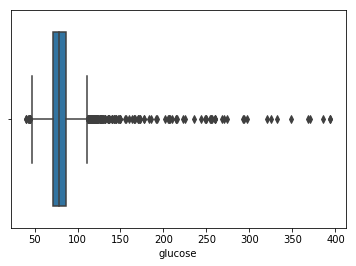

In [11]:
# Checking for outliers in the data set

cols=["age","cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose"]

for col in cols:
    sns.boxplot(df[col])
    #df[col].plot(kind='box')
    plt.show()

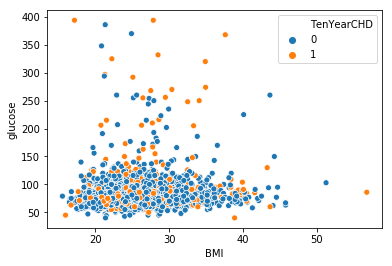

In [12]:
sns.scatterplot(df["BMI"],df["glucose"],hue=df["TenYearCHD"])

## Performing Statistical Logit Model

In [13]:
import statsmodels.api as sm
y=df.TenYearCHD
X=df.drop('TenYearCHD',axis=1)

In [14]:
Xc=sm.add_constant(X)
model=sm.Logit(y,Xc)
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.378972
         Iterations 7


/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4238
Model:                          Logit   Df Residuals:                     4222
Method:                           MLE   Df Model:                           15
Date:                Thu, 26 Mar 2020   Pseudo R-squ.:                  0.1106
Time:                        19:40:52   Log-Likelihood:                -1606.1
converged:                       True   LL-Null:                       -1805.8
Covariance Type:            nonrobust   LLR p-value:                 9.338e-76
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.9695      0.659    -12.098      0.000      -9.261      -6.678
male                0.5092      0.100      5.074      0.000       0.313       0.706
age                 0.0619      0.006      9.962      0.000       0.050       0.074
education          -0.0154      0.046     -0.338      0.735      -0.105       0.074
currentSmoker       0.0132      0.144      0.092      0.927      -0.268       0.295
cigsPerDay          0.0209      0.006      3.684      0.000       0.010       0.032
BPMeds              0.2308      0.219      1.053      0.292      -0.199       0.660
prevalentStroke     0.9705      0.441      2.199      0.028       0.106       1.835
prevalentHyp        0.2350      0.128      1.831      0.067      -0.017       0.487
diabetes            0.3056      0.281      1.086      0.277      -0.246       0.857
totChol             0.0017      0.001      1.704      0.088      -0.000       0.004
sysBP               0.0142      0.004      4.011      0.000       0.007       0.021
diaBP              -0.0028      0.006     -0.473      0.636      -0.015       0.009
BMI                 0.0018      0.012      0.156      0.876      -0.021       0.025
heartRate          -0.0014      0.004     -0.355      0.723      -0.009       0.006
glucose             0.0055      0.002      2.793      0.005       0.002       0.009
===================================================================================
"""

In [15]:
# check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(Xc.values, i) for i in range(Xc.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
vif,1.196715,1.372304,1.052767,2.495317,2.622916,1.09953,1.018961,2.052546,1.509882,1.107182,3.738878,2.967349,1.23364,1.094984,1.527711


## VIF tabel shows there is few serious multicollonearity
## backward elimination to drop varables one by one


In [17]:
# VIF tabel shows tht there is no serious multicollonearity
# backward elimination to drop varables one by one

cols=list(Xc.columns)
p=[]
while len(cols)>2:
    Xc=Xc[cols]
    model=sm.Logit(y,Xc).fit().pvalues
    p=pd.Series(model.values[1:],index=Xc.columns[1:])
    pmax= max(p)
    pid=p.idxmax()
    
    if pmax>0.05:
        cols.remove(pid)
        print('column removed :',pid,pmax)
    else:
        break
        
cols

Optimization terminated successfully.
         Current function value: 0.378972
         Iterations 7
column removed : currentSmoker 0.9268927129149964
Optimization terminated successfully.
         Current function value: 0.378973
         Iterations 7
column removed : BMI 0.8840047212771569
Optimization terminated successfully.
         Current function value: 0.378976
         Iterations 7
column removed : heartRate 0.724773464288879
Optimization terminated successfully.
         Current function value: 0.378991
         Iterations 7
column removed : education 0.7303834746694666
Optimization terminated successfully.
         Current function value: 0.379005
         Iterations 7
column removed : diaBP 0.6215518600282737
Optimization terminated successfully.
         Current function value: 0.379033
         Iterations 7
column removed : BPMeds 0.28453387969946076
Optimization terminated successfully.
         Current function value: 0.379166
         Iterations 7
column removed : di

['const', 'male', 'age', 'cigsPerDay', 'prevalentStroke', 'sysBP', 'glucose']

In [18]:
model=sm.Logit(y,Xc[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.380085
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4238
Model:                          Logit   Df Residuals:                     4231
Method:                           MLE   Df Model:                            6
Date:                Thu, 26 Mar 2020   Pseudo R-squ.:                  0.1080
Time:                        19:40:53   Log-Likelihood:                -1610.8
converged:                       True   LL-Null:                       -1805.8
Covariance Type:            nonrobust   LLR p-value:                 4.049e-81
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.3983      0.387    -21.715      0.000      -9.156      -7.640
male                0.4910      0.097      5.054      0.000       0.301       0.681
age                 0.0645      0.006     10.907      0.000       0.053       0.076
cigsPerDay          0.0211      0.004      5.512      0.000       0.014       0.029
prevalentStroke     1.0511      0.436      2.411      0.016       0.197       1.906
sysBP               0.0172      0.002      8.580      0.000       0.013       0.021
glucose             0.0067      0.002      4.369      0.000       0.004       0.010
===================================================================================
"""

In [19]:
# Checking the coeffecients of the features
exp_cof=np.exp(result.params)
exp_cof

const              0.000225
male               1.633968
age                1.066677
cigsPerDay         1.021354
prevalentStroke    2.860746
sysBP              1.017310
glucose            1.006771
dtype: float64

In [20]:
## Age
## 1.Positive sign of age co efficient indicate that, probability of CHD increases with age
## 2.When age increase by 1 yr, log(odds) of CHD increase by 0.0646
## 3.When age increase by 1 yr, odds of CHD increase by 6%(So 1.066-1)

In [21]:
## Male
# 1.Positive sign of male co efficient indicate that, probability of CHD in male is high.
# 2.log(odds) of CHD for male is higher by 0.49 compared to female
# 3.odds(male)/odds(female)=1.63, odds(male) is 63% higher compared to odds(female)


In [22]:
## Assiging the threshold to determine the prediction from probability

In [23]:
prob=result.predict(Xc[cols])
prob.name='prob'
df_pred=pd.DataFrame([prob,y]).T
df_pred['pred']=df_pred['prob'].apply(lambda x:0 if x<0.5 else 1)
df_pred

,prob,TenYearCHD,pred
0,0.045171,0.0,0
1,0.055223,0.0,0
2,0.151125,0.0,0
3,0.364114,1.0,0
4,0.105421,0.0,0
...,...,...,...
4233,0.267694,1.0,0
4234,0.254105,0.0,0
4235,0.114176,0.0,0
4236,0.076573,0.0,0


In [24]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [25]:
confusion_matrix(df_pred.TenYearCHD,df_pred.pred)

array([[3569,   25],
       [ 593,   51]])

In [26]:
accuracy_score(df_pred['TenYearCHD'],df_pred['pred'])

0.8541764983482775

In [27]:
print(classification_report(df_pred['TenYearCHD'],df_pred['pred']))

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92      3594
         1.0       0.67      0.08      0.14       644

    accuracy                           0.85      4238
   macro avg       0.76      0.54      0.53      4238
weighted avg       0.83      0.85      0.80      4238



## roc analisys

In [28]:
from sklearn.metrics import roc_auc_score , roc_curve

In [29]:
print('AUC for model:',roc_auc_score(df_pred['TenYearCHD'],df_pred['prob']))
print('ROC for model:',roc_curve(df_pred['TenYearCHD'],df_pred['prob']))

AUC for model: 0.7287583774890518
ROC for model: (array([0.        , 0.        , 0.        , ..., 0.99805231, 0.99805231,
       1.        ]), array([0.        , 0.0015528 , 0.00465839, ..., 0.9984472 , 1.        ,
       1.        ]), array([1.91098344, 0.91098344, 0.88956982, ..., 0.02051858, 0.02025507,
       0.01758791]))


In [30]:
fpr,tpr,threshold=roc_curve(df_pred['TenYearCHD'],df_pred['prob'])

Text(0, 0.5, 'tpr')

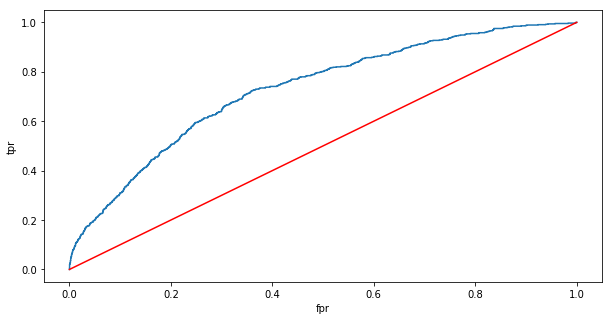

In [31]:
plt.figure(figsize=(10,5))
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('fpr')
plt.ylabel('tpr')

In [32]:
threshold[0]=threshold[0]-1

Text(0, 0.5, 'tpr')

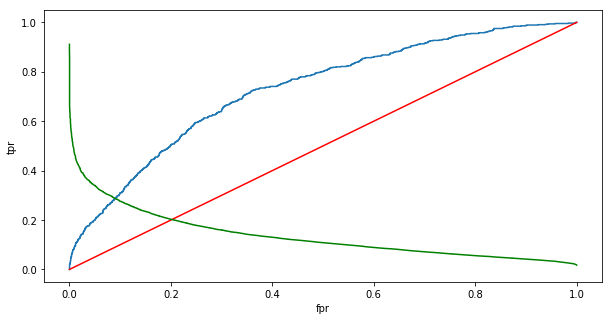

In [33]:
plt.figure(figsize=(10,5))
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.plot(fpr,threshold,'g-')
plt.xlabel('fpr')
plt.ylabel('tpr')

In [34]:
# Model is not performing its best in estimation, there is a large trade of bias and variance in the  model

## Machine Learning 

In [35]:
# Declare x,y and split using X_train and y_train
X= df.drop(['TenYearCHD'],axis='columns')
y= df.TenYearCHD
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2966, 15)
(2966,)
(1272, 15)
(1272,)


In [36]:
# Determine the logisticRegression to validate x_test and y_test
# Logistic Regression is maximum likehood model-- iteration till the maximum
# Using solver we can stimulate and converge at a faster rate
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(fit_intercept=True,solver='liblinear')

In [37]:
lr.fit(X_train, y_train)  
# In stats we provide y,x while machine learning we provide X,y
# Check for any warning if its there again you need to do that

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
# Determine the prediction and Probability
y_train_prob = lr.predict_proba(X_train)[:,1]
y_train_pred = lr.predict(X_train)
y_train_prob  # output- Probability for 0 and 1 i.e ( P,(1-P)) # thats the reason we slice and take the value for 1 alone

array([0.15354647, 0.40755877, 0.14066192, ..., 0.12498089, 0.09795486,
       0.03977144])

confusion_matrix 
 [[2475   13]
 [ 442   36]]
accuracy_score 0.8465947403910992
roc_accuracy acore 0.729854767318274
classification_report 
                precision    recall  f1-score   support

           0       0.85      0.99      0.92      2488
           1       0.73      0.08      0.14       478

    accuracy                           0.85      2966
   macro avg       0.79      0.54      0.53      2966
weighted avg       0.83      0.85      0.79      2966



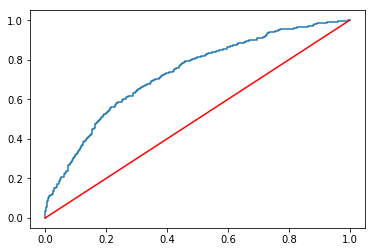

In [39]:
# Evaluating on the training data
# Determine the confusion matrix ,accuracy_score,roc_curve,roc_auc_score,classification_report
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score,classification_report
print("confusion_matrix \n",confusion_matrix(y_train,y_train_pred))         # Evaluating the data on the trained data set-->Train and Predicted
print("accuracy_score",accuracy_score(y_train,y_train_pred))           # Train and Predicted
print("roc_accuracy acore",roc_auc_score(y_train,y_train_prob))                 # Train and Probability
print("classification_report \n ",classification_report(y_train,y_train_pred))   # Train and Predicted
fpr, tpr, thresholds =roc_curve(y_train,y_train_prob)  # Train and Probability-- Plotting

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, "r-")
plt.show()

confusion_matrix 
 [[1096   10]
 [ 156   10]]
accuracy_score 0.8694968553459119
roc_accuracy acore 0.7084903810540535
classification_report 
                precision    recall  f1-score   support

           0       0.85      0.99      0.92      2488
           1       0.73      0.08      0.14       478

    accuracy                           0.85      2966
   macro avg       0.79      0.54      0.53      2966
weighted avg       0.83      0.85      0.79      2966



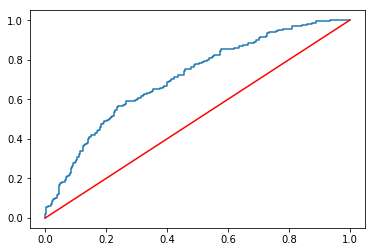

In [40]:
# Validating the data on the test data set
y_test_prob = lr.predict_proba(X_test)[:,1]
y_test_pred = lr.predict(X_test)
print("confusion_matrix \n",confusion_matrix(y_test,y_test_pred))         # Validating the data on the trained data set-->Train and Predicted
print("accuracy_score",accuracy_score(y_test,y_test_pred))           # Test and Predicted
print("roc_accuracy acore",roc_auc_score(y_test,y_test_prob))                 # Test and Probability
print("classification_report \n ",classification_report(y_train,y_train_pred))   # Test and Predicted
fpr,tpr,thresholds = roc_curve(y_test,y_test_prob)  # Test and Probability-- Plotting
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, "r-")
plt.show()

In [41]:
# Model is Performing good in both Test and Training data Set

In [42]:
# IF we want to change the thresold to estimate the predicts( threshold= 0.25)

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score

X, y = make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_features=20, n_samples=1000, random_state=10
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = LogisticRegression(class_weight="balanced")
clf.fit(X_train, y_train)
THRESHOLD = 0.25
preds = np.where(clf.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])


,0
accuracy,0.933333
recall,0.861111
precision,0.645833
roc_auc_score,0.901644


In [43]:
## Statistical Model, Machine Learning Model both performs with a normal accuracy of 85% 
## If the threshold value is been reduced to 25% rather than 50% the accuarcy value increases with the sacrifice of precision